# Get the data

### Get reimbursements data

In [1]:
import pandas as pd
import numpy as np

print("Importing reimbursments dataframe")
reimbursements_df = pd.read_csv(
    './datasets/reimbursements_2018_complete_df.csv',
    comment='#',
    dtype={
        'applicant_id': np.str,
        'cnpj_cpf': np.str,
        'congressperson_id': np.str,
        'leg_of_the_trip': np.str,
        'subquota_group_description': np.str,
        'subquota_number': np.str,
    }
)
print("DATAFRAME IMPORTED SUCCESSFULLY!\n")

# CLEAN DATA
print("-> Renaming reimbursement id column")
reimbursements_df = reimbursements_df.rename(columns={"Unnamed: 0": "reimbursement_id"})
print("-> Dropping anomalous blank rows")
reimbursements_df = reimbursements_df[~reimbursements_df.receita_api_erro.isna()]
print(f"-> DATAFRAME SHAPE: {reimbursements_df.shape[0]} rows and {reimbursements_df.shape[1]} columns")
print("DONE")

Importing reimbursments dataframe


/Users/appsimples/MyProjects/QuintoAndar/big-fone/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DATAFRAME IMPORTED SUCCESSFULLY!

-> Renaming reimbursement id column
-> Dropping anomalous blank rows
-> DATAFRAME SHAPE: 292381 rows and 35 columns
DONE


### Get political parties data

In [2]:
import pandas as pd

print("Importing political parties dataframe")
political_parties_raw_df = pd.read_csv('./datasets/polical_parties_data_2019_sept_08.csv',
                                       comment='#',
                                       dtype={'DATA DA REGULARIZACAO': np.str,
                                              'DATA DA FILIACAO': np.str})
print("DATAFRAME IMPORTED SUCCESSFULLY!\n")

# CLEAN DATA
print("-> Fixing row with membership date equal to 'VANDERLUCE G'")
political_parties_raw_df.loc[political_parties_raw_df['NUMERO DA INSCRICAO'] == 'VANDERLUCE G', 'NUMERO DA INSCRICAO'] = -1
print("-> Transforming column 'NUMERO DA INSCRICAO' type in integer")
political_parties_raw_df['NUMERO DA INSCRICAO'] = political_parties_raw_df['NUMERO DA INSCRICAO'].astype('int32')
print("-> Dropping rowid column")
political_parties_raw_df = political_parties_raw_df.drop('Unnamed: 0', axis="columns")
print("-> Transforming column 'DATA DA FILIACAO' in datetime type")
political_parties_raw_df['DATA DA FILIACAO'] = pd.to_datetime(political_parties_raw_df['DATA DA FILIACAO'],
                                                              format='%d/%m/%Y',
                                                              utc=True, 
                                                              errors = 'coerce')
print()
print(f"-> DATAFRAME SHAPE: {political_parties_raw_df.shape[0]} rows and {political_parties_raw_df.shape[1]} columns")

Importing political parties dataframe


/Users/appsimples/MyProjects/QuintoAndar/big-fone/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DATAFRAME IMPORTED SUCCESSFULLY!

-> Fixing row with membership date equal to 'VANDERLUCE G'
-> Transforming column 'NUMERO DA INSCRICAO' type in integer
-> Dropping rowid column
-> Transforming column 'DATA DA FILIACAO' in datetime type

-> DATAFRAME SHAPE: 22007756 rows and 19 columns


# Knowing a bit the data we have available

## Political Parties Affiates dataframe

In [31]:
# To get a sense of what the political parties affiliates dataset brings us...
# Which columns do we have available and may be insteresting?
display(political_parties_raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22007756 entries, 0 to 22007755
Data columns (total 20 columns):
DATA DA EXTRACAO          object
HORA DA EXTRACAO          object
NUMERO DA INSCRICAO       int32
NOME DO FILIADO           object
SIGLA DO PARTIDO          object
NOME DO PARTIDO           object
UF                        object
CODIGO DO MUNICIPIO       float64
NOME DO MUNICIPIO         object
ZONA ELEITORAL            float64
SECAO ELEITORAL           float64
DATA DA FILIACAO          datetime64[ns, UTC]
SITUACAO DO REGISTRO      object
TIPO DO REGISTRO          object
DATA DO PROCESSAMENTO     object
DATA DA DESFILIACAO       object
DATA DO CANCELAMENTO      object
DATA DA REGULARIZACAO     object
MOTIVO DO CANCELAMENTO    object
company_owner_name        object
dtypes: datetime64[ns, UTC](1), float64(3), int32(1), object(15)
memory usage: 3.2+ GB


None

In [14]:
# Let's take a glimpse of the affiliates data
political_parties_raw_df.head()

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,08/09/2019,00:56:58,-417544835,MANOEL BASTOS DE ALMEIDA,DEM,DEMOCRATAS,AC,1007.0,BUJARI,9.0,8.0,2007-09-27 00:00:00+00:00,REGULAR,OFICIAL,14/10/2017,NaN,NaN,NaN,NaN
1,08/09/2019,00:56:58,138962470,VERA LUCIA FIGUEIREDO GADELHA,DEM,DEMOCRATAS,AC,1570.0,ASSIS BRASIL,6.0,73.0,1988-04-13 00:00:00+00:00,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN
2,08/09/2019,00:56:58,-973874835,VIVIANE DA CRUZ,DEM,DEMOCRATAS,AC,1392.0,RIO BRANCO,10.0,67.0,2002-09-23 00:00:00+00:00,REGULAR,OFICIAL,15/04/2016,NaN,NaN,NaN,NaN
3,08/09/2019,00:56:58,1842062445,RAIMUNDO DAMIAO PEREIRA LIMA,DEM,DEMOCRATAS,AC,1457.0,SENA MADUREIRA,3.0,55.0,1999-06-06 00:00:00+00:00,CANCELADO,OFICIAL,14/04/2018,27/09/2005,27/09/2005,NaN,A pedido do eleitor
4,08/09/2019,00:56:58,-1573754894,ATIVALDO VASCO LOURENCO GOMES,DEM,DEMOCRATAS,AC,1538.0,SENADOR GUIOMARD,8.0,69.0,1995-12-04 00:00:00+00:00,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN


Apparently, the fields `"DATA DA EXTRACAO"` and `"HORA DA EXTRACAO"` refer to the day when the data was fetched and **may be ignored for our purpose**.

### Just by curiosity, let's see what we have in some columns:

In [24]:
print('Types of different Registration Status in the dataframe: ')
display(political_parties_raw_df['SITUACAO DO REGISTRO'].value_counts())

Types of different Registration Status in the dataframe: 


REGULAR       16708315
CANCELADO      4796475
DESFILIADO      495113
SUB JUDICE        7851
Name: SITUACAO DO REGISTRO, dtype: int64

Although most of the people in our dataset are still affiliated with some political party, **we can see that we have also stored in it people who are no longer affiliated with the party**.

This is interesting because we can use this history of people who have passed through a political party to pick up cases where the people involved are not currently from the same party but may have met when they were in the same party.

In [29]:
print(f'Amount of rows in the dataframe.................: {len(political_parties_raw_df)}')
print(f'Amount of different affiliates in the dataframe.: {political_parties_raw_df["NUMERO DA INSCRICAO"].nunique()}')

Amount of rows in the dataframe.................: 22007756
Amount of different affiliates in the dataframe.: 18465146


As we can see (and as we can imagine with the info in the previous cell), we have a lot of repeated occurrencies for the same affiliate.

This is probably because the same person left one party to join another.

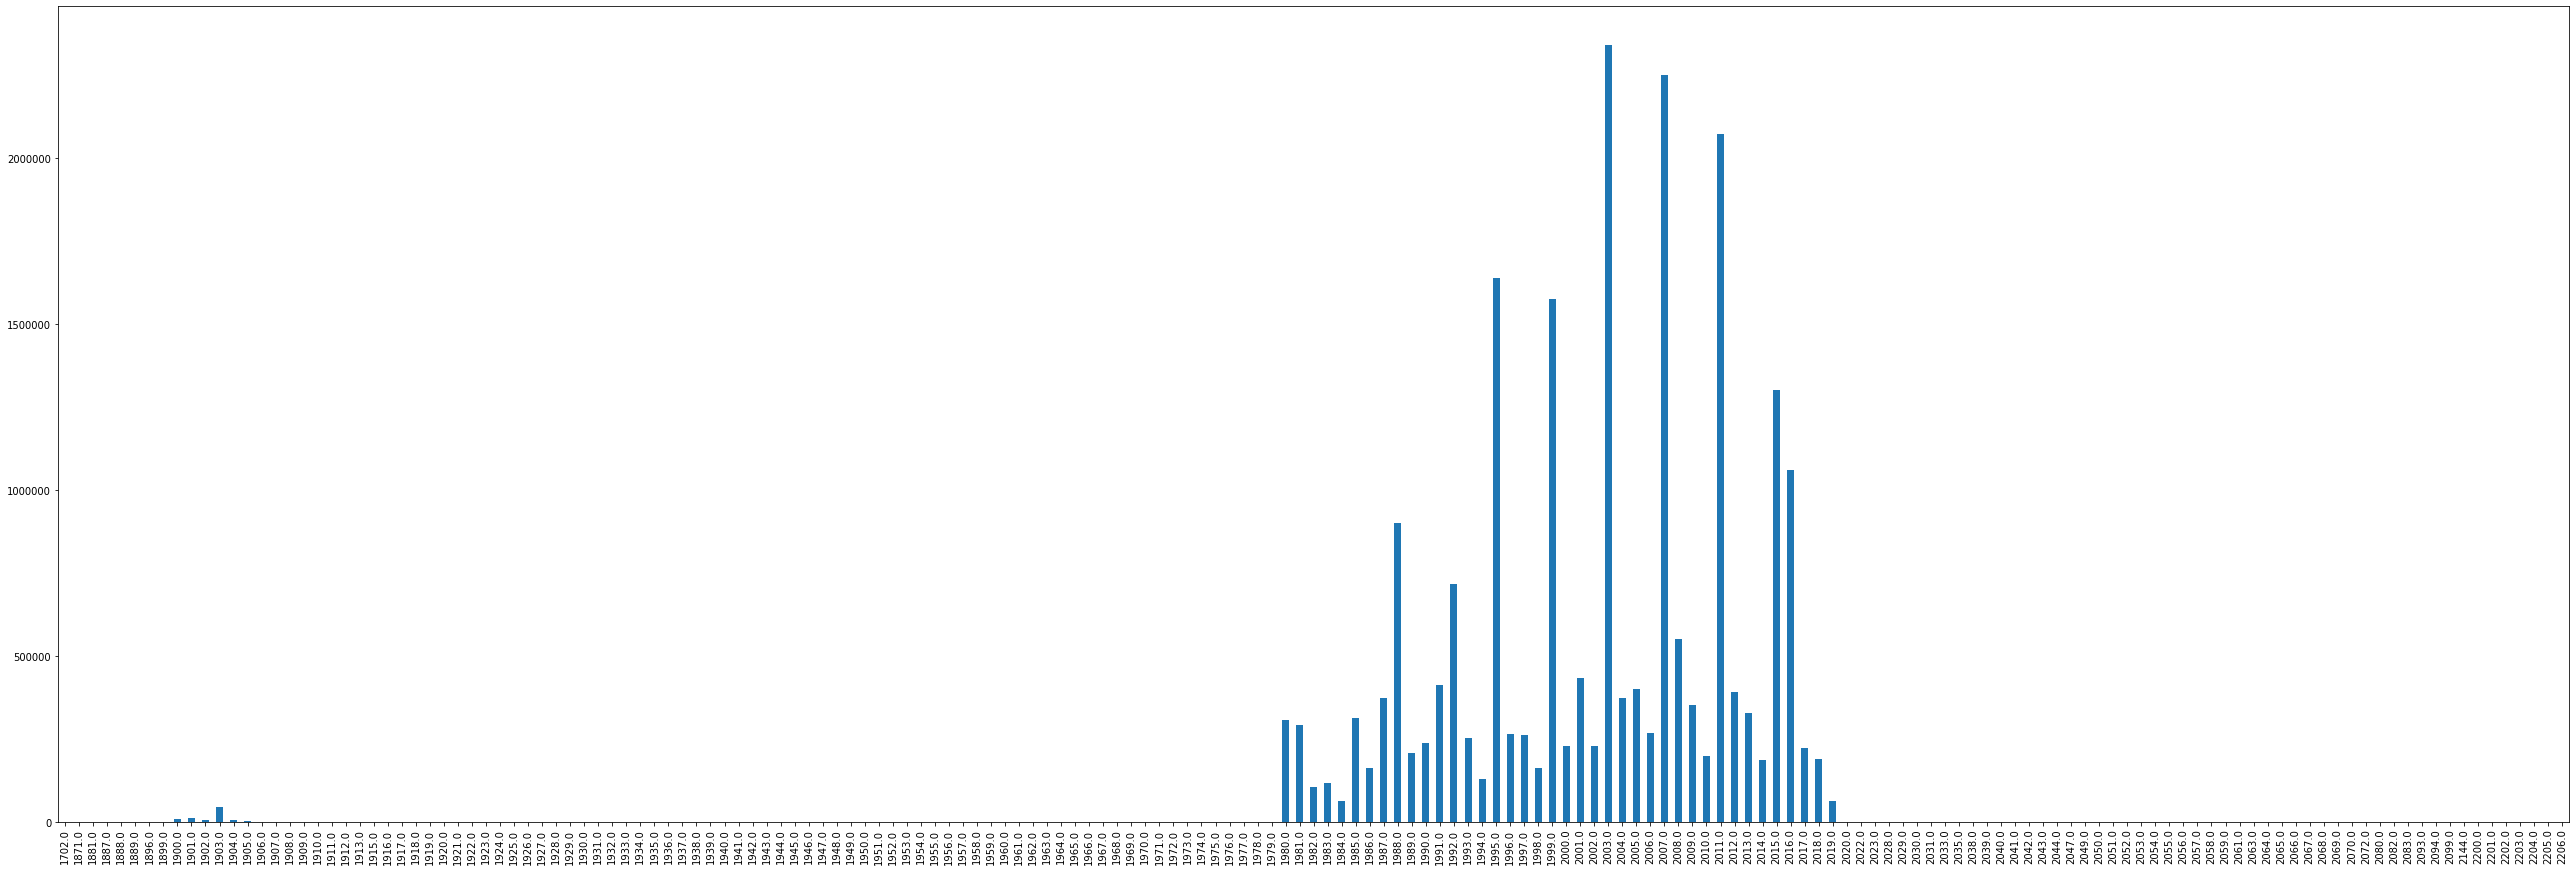

In [69]:
# When the affiliates entered their political parties?
graph = political_parties_raw_df["DATA DA FILIACAO"].dt.year.value_counts(sort=False)\
                                                            .plot.bar(figsize=(45,15), rot=90)
display(graph)

The graph above shows which year political affiliates joined their parties. It's hard to see the x-axis labels, but they start in the year 1702 and go up to 2206.

This is very strange and shows several inconsistencies within this table regarding this field.

The most grouped central part goes from 1980 to 2019.

In [25]:
# Apparently we don't have much interesting stuff in this column
print('Different Registration Types in the dataframe:')
display(political_parties_raw_df['TIPO DO REGISTRO'].value_counts())

Different Registration Types in the dataframe: 


OFICIAL    22007754
Name: TIPO DO REGISTRO, dtype: int64

In [26]:
# Just by curiosity
print('Different types of Cancelation Reason:')
display(political_parties_raw_df['MOTIVO DO CANCELAMENTO'].value_counts())

Different types of Cancelation Reason:


Judicial                   1825039
A pedido do eleitor        1513444
Cancelamento automático    1126569
A pedido do partido          90147
Name: MOTIVO DO CANCELAMENTO, dtype: int64

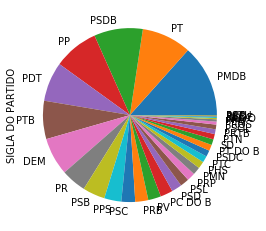

In [71]:
# Wich political parties had more affiliates in the history?
display(
    political_parties_raw_df['SIGLA DO PARTIDO'].value_counts().plot.pie()
)

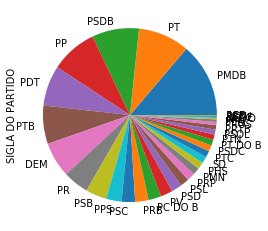

In [72]:
# Wich political parties currently have more regularized affiliates?
display(
    political_parties_raw_df[
        political_parties_raw_df['SITUACAO DO REGISTRO'] == 'REGULAR'
    ]['SIGLA DO PARTIDO'].value_counts().plot.pie()
)

## Reimbursements dataframe

In [76]:
# To get a sense of what the political parties affiliates dataset brings us...
# Which columns do we have available and may be insteresting?
reimbursements_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292381 entries, 0 to 292381
Data columns (total 35 columns):
reimbursement_id              292381 non-null int64
congressperson_name           292381 non-null object
cpf                           291630 non-null float64
congressperson_id             291630 non-null object
congressperson_document       291630 non-null float64
term                          292381 non-null int64
state                         291630 non-null object
party                         291630 non-null object
term_id                       292381 non-null int64
subquota_number               292381 non-null object
subquota_description          292381 non-null object
subquota_group_id             292381 non-null int64
subquota_group_description    61835 non-null object
supplier                      292381 non-null object
cnpj_cpf                      292381 non-null object
document_number               292381 non-null object
document_type                 292381 non-nul

In [82]:
# Let's take a glimpse of the affiliates data
reimbursements_df.tail()

,reimbursement_id,congressperson_name,cpf,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,...,leg_of_the_trip,batch_number,numbers,total_value,applicant_id,document_id,company_owners_list,company_qtd_owners,receita_api_company_name,receita_api_erro
292377,292377,MAGDA MOFATTO,1.320529e+10,166402,431.0,2015,GO,PR,55,1,...,NaN,1576974.0,[nan],0.0,2437,6787364.0,"[{'qual': '10-Diretor', 'nome': 'BRENO RODRIGO...",3.0,TELEFONICA BRASIL S.A.,False
292378,292378,HIRAN GONÇALVES,1.499717e+10,178959,4.0,2015,RR,PP,55,5,...,NaN,1577313.0,[nan],0.0,3032,6788508.0,[{'qual': '65-Titular Pessoa Física Residente ...,1.0,TOTALGRAF GRAFICA E EDITORA EIRELI,False
292379,292379,HUGO MOTTA,4.796249e+09,160674,132.0,2015,PB,PRB,55,4,...,NaN,1577398.0,[nan],0.0,2271,6788737.0,"[{'qual': '49-Sócio-Administrador', 'nome': 'C...",2.0,SIGMA-ALGEBRA SERVICOS DE PESQUISAS E SOLUCOES...,False
292380,292380,LUCAS VERGILIO,1.745455e+09,178879,430.0,2015,GO,SOLIDARIEDADE,55,5,...,NaN,1578051.0,[nan],0.0,3063,6790484.0,[{'qual': '65-Titular Pessoa Física Residente ...,1.0,EXPRESS ETIQUETAS E COMERCIO EIRELI,False
292381,292381,JOÃO DERLY,8.103125e+10,178965,514.0,2015,RS,REDE,55,10,...,NaN,1579444.0,[nan],0.0,2937,6793951.0,"[{'qual': '10-Diretor', 'nome': 'BRENO RODRIGO...",3.0,TELEFONICA BRASIL S.A.,False


In [85]:
# As we can see we don't have the congressperson's CPF value when the buyer 
# is not a congressperson but a political party itself
reimbursements_df[reimbursements_df.cpf.isna()].congressperson_name.value_counts()

LIDERANÇA DO PT      259
PODE                 181
LIDERANÇA DO PSDB     98
PROS                  58
SDD                   56
LID.GOV-CD            26
PDT                   19
LID.GOV-CN            19
DEM                   15
AVANTE                 7
PSOL                   6
PSD                    5
PHS                    2
Name: congressperson_name, dtype: int64

In [79]:
# How many different suppliers/CNPJs do we have per refund category?
reimbursements_df.groupby('subquota_description')['cnpj_cpf'].nunique()

subquota_description
Aircraft renting or charter of aircraft                        49
Automotive vehicle renting or charter                         486
Congressperson meal                                          3739
Consultancy, research and technical work                      474
Flight ticket issue                                             5
Flight tickets                                                 60
Fuels and lubricants                                        10402
Lodging, except for congressperson from Distrito Federal     2264
Maintenance of office supporting parliamentary activity      1771
Participation in course, talk or similar event                  5
Postal services                                               320
Publication subscriptions                                     109
Publicity of parliamentary activity                          2415
Security service provided by specialized company               79
Taxi, toll and parking                                 

In [87]:
# As we have so few 'Flight ticket issue' supliers let's take a glimpse on them
display(
    reimbursements_df[
        reimbursements_df.subquota_description == 'Flight ticket issue'
    ]['supplier'].value_counts()
)

Cia Aérea - GOL          39943
Cia Aérea - TAM          27649
Cia Aérea - AVIANCA      14149
Cia Aérea - AZUL          9352
Cia Aérea - PASSAREDO     1027
Name: supplier, dtype: int64

In [86]:
# As we have so few 'Participation in course, talk or similar event' supliers let's take a glimpse on them
display(
    reimbursements_df[
        reimbursements_df.subquota_description == 'Participation in course, talk or similar event'
    ]['supplier'].value_counts()
)

Center on the Developing Child - Harvard University    3
RICARDO DA SILVA OLIVEIRA ME                           2
Casa do Saber do Rio de Janeiro  Eventos Culturais     2
BERLITZ CENTRO DE IDIOMAS S/A                          2
PUBLIC AFFAIRS COUNCIL                                 2
RICARDO DA SILVA OLIVEIRA                              1
CONNECTED INTELIGENCE LIMITED                          1
Fira  Barcelona                                        1
Center on the Developing Child                         1
Center on the Developint Child - Harvard University    1
UNICRED Florianópolis                                  1
Center on the Developing Child - HHarvar University    1
Name: supplier, dtype: int64

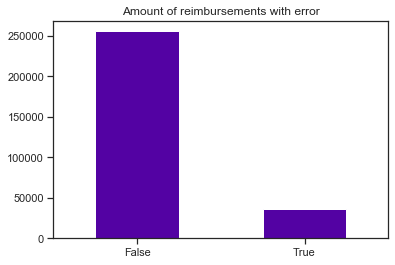

In [56]:
sns.set(style="ticks", palette="plasma") # using a beautiful color in my graph

# We got 36678 reimbursements with errors retrieving the supplier company data (True labels in the graph)
# versus 255703 reimbursements without errors (False labels in the graph)
display(
    reimbursements_df.receita_api_erro.value_counts().plot.bar(
        title="Amount of reimbursements with error",
        rot=0,
    )
)

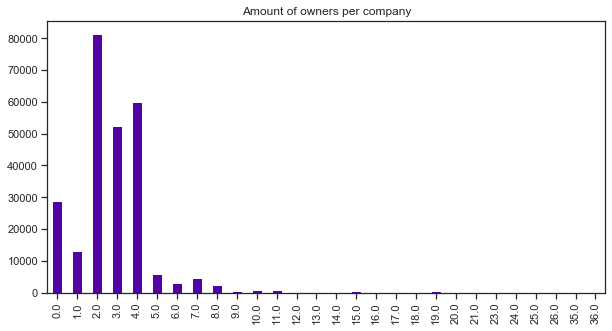

In [57]:
sns.set(style="ticks", palette="plasma") # using a beautiful color in my graph

# Let's see how many owners the companies usually have
display(
    reimbursements_df.company_qtd_owners.value_counts()\
                                        .sort_index()\
                                        .plot.bar(
                                                figsize=(10,5),
                                                title="Amount of owners per company",
                                        )
)
# The suppliers with 0 owners are the one with error getting the company info
# We'll see this chart again later (but with more details)

# Join the two dataframes

Since we have no unique CPF value to accurately relate political affiliates to business owners, we will use the name as the key to the match.

Important to say that this *is not an accurate way to this match* because homonyms exist.
But it is still a way to help finding suspicious cases automatically with the same 
allowances a human would have access to if wanted to perform the same search manually.

## Cleaning the dataframes

In order to join them, first we need to standardize the name to ensure that equal names will be treated as equal and reshape the dataframes so we can get the insights that we want.

### Cleaning Reimbursements dataframe

In [4]:
def ownersDictToNamesList(owners_dict_list):
    response = []
    # if the list exists and is of a valid type
    if owners_dict_list and type(owners_dict_list) is not float:
        dict_list = eval(owners_dict_list)  # transform the json into a list of python dictionaries
        # for each dictionary in the list
        for owner in dict_list:
            # get the name of the owner  and store it in the response
            if owner.get('nome'):
                response.append(owner.get('nome'))
    return response

# Store a copy of the dataframe without the reshaping because it may be useful for the analysis
reimbursements_reshaped_df = reimbursements_df.copy()
print('Maping the company owners to create a list containing only their names.')
# Creating a column called 'company_owner_name' that by now will have a list with the company owners names
reimbursements_reshaped_df['company_owner_name'] = reimbursements_reshaped_df.company_owners_list.map(ownersDictToNamesList)
print('Creating new column "company_owner_name" with the separated company owner names by row')
# We will reshape the dataframe with some magic spreading the 'company_owner_name' column so it 
# will not longer store a list but a single owner name per row.
reimbursements_reshaped_df = reimbursements_reshaped_df['company_owner_name']\
                                                            .apply(lambda x: pd.Series(x))\
                                                            .stack()\
                                                            .reset_index(level=1, drop=True)\
                                                            .to_frame('company_owner_name')\
                                                            .join(reimbursements_reshaped_df.drop("company_owner_name", axis=1), how='right')
print("Transforming all the owners names to lower case")
reimbursements_reshaped_df['company_owner_name'] = reimbursements_reshaped_df.company_owner_name.str.lower()
print("Fill missing company owners with empty string")
reimbursements_reshaped_df['company_owner_name'] = reimbursements_reshaped_df.company_owner_name.fillna("")
print("-> DONE!")
print()
print(f"Final reimbursements_df dataset shape: {reimbursements_reshaped_df.shape[0]} rows and {reimbursements_reshaped_df.shape[1]} columns")
print(f'We have {reimbursements_reshaped_df.company_owner_name.nunique()} different owner names')

Maping the company owners to create a list containing only their names.
Creating new column "company_owner_name" with the separated company owner names by row
Transforming all the owners names to lower case
Fill missing company owners with empty string
-> DONE!

Final reimbursements_df dataset shape: 787956 rows and 36 columns
We have 33361 different owner names


In [122]:
# This is how the new reshaped dataframe looks like
# As you can see, for the same 'reimbursement_id' we have one 'company_owner_name' per row
# It will make easier for us to match the names of the owners with the parties affiliates
# and to count those matches
display(reimbursements_reshaped_df.tail())

,company_owner_name,reimbursement_id,congressperson_name,cpf,congressperson_id,congressperson_document,term,state,party,term_id,...,leg_of_the_trip,batch_number,numbers,total_value,applicant_id,document_id,company_owners_list,company_qtd_owners,receita_api_company_name,receita_api_erro
292379,alex raia silva,292379,HUGO MOTTA,4.796249e+09,160674,132.0,2015,PB,PRB,55,...,NaN,1577398.0,[nan],0.0,2271,6788737.0,"[{'qual': '49-Sócio-Administrador', 'nome': 'C...",2.0,SIGMA-ALGEBRA SERVICOS DE PESQUISAS E SOLUCOES...,False
292380,ariel de melo fagundes,292380,LUCAS VERGILIO,1.745455e+09,178879,430.0,2015,GO,SOLIDARIEDADE,55,...,NaN,1578051.0,[nan],0.0,3063,6790484.0,[{'qual': '65-Titular Pessoa Física Residente ...,1.0,EXPRESS ETIQUETAS E COMERCIO EIRELI,False
292381,breno rodrigo pacheco de oliveira,292381,JOÃO DERLY,8.103125e+10,178965,514.0,2015,RS,REDE,55,...,NaN,1579444.0,[nan],0.0,2937,6793951.0,"[{'qual': '10-Diretor', 'nome': 'BRENO RODRIGO...",3.0,TELEFONICA BRASIL S.A.,False
292381,david melcon sanchez friera,292381,JOÃO DERLY,8.103125e+10,178965,514.0,2015,RS,REDE,55,...,NaN,1579444.0,[nan],0.0,2937,6793951.0,"[{'qual': '10-Diretor', 'nome': 'BRENO RODRIGO...",3.0,TELEFONICA BRASIL S.A.,False
292381,christian mauad gebara,292381,JOÃO DERLY,8.103125e+10,178965,514.0,2015,RS,REDE,55,...,NaN,1579444.0,[nan],0.0,2937,6793951.0,"[{'qual': '10-Diretor', 'nome': 'BRENO RODRIGO...",3.0,TELEFONICA BRASIL S.A.,False


### Cleaning political parties df

In [39]:
print('AFFILIATED TO POLITICAL PARTIES RAW DATA FRAME')
print('Transforming all the parties names to lower case')
political_parties_raw_df['company_owner_name'] = political_parties_raw_df['NOME DO FILIADO'].str.lower()
# just for curiosity, let's see some stats about the regularized affiliates
currently_regularized_affiliates = political_parties_raw_df[political_parties_raw_df["SITUACAO DO REGISTRO"]=='REGULAR']

print(f'-> shape: {political_parties_raw_df.shape[0]} rows and {political_parties_raw_df.shape[1]} columns')
print(f'-> Amount of different affiliated names............: {political_parties_raw_df["NOME DO FILIADO"].nunique()}')
print(f'-> Amount of regularized affiliates................: {currently_regularized_affiliates.shape[0]}')
print(f'-> Amount of different regularized affiliated names: {currently_regularized_affiliates["NOME DO FILIADO"].nunique()}')
print("-> DONE!")

AFFILIATED TO POLITICAL PARTIES RAW DATA FRAME
Transforming all the parties names to lower case
-> shape: 22007756 rows and 20 columns
-> Amount of different affiliated names............: 14285696
-> Amount of regularized affiliates................: 16708315
-> Amount of different regularized affiliated names: 12840090
-> DONE!


One more insight we can draw from the above data is that even among regularized affiliates there are a lot of homonyms (people of the same name) (around 400,000 people if we compare the "Amount of regularized affiliates" with the "Amount of different regularized affiliated names").

However, looking more closely at some cases in our dataframe, there are situations where the same person (same name and same registration number) is regularly affiliated to two different parties, such as FRANCISCO EILDO DA BORSO DE SOUSA below, who is affiliated in both the DEM and PMDB parties in Acre.

In [48]:
# Checking this case where the person is regularly affiliated to more than one party at the same time
currently_regularized_affiliates[currently_regularized_affiliates['NUMERO DA INSCRICAO']==20592410]

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO,company_owner_name
2161,08/09/2019,00:56:58,20592410,FRANCISCO EILDO DO NASCIMENTO DE SOUSA,DEM,DEMOCRATAS,AC,1139.0,FEIJÓ,7.0,25.0,2019-01-01 00:00:00+00:00,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN,francisco eildo do nascimento de sousa
29566,28/05/2018,00:40:30,20592410,FRANCISCO LEILDO DO NASCIMENTO DE SOUSA,PMDB,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,AC,1139.0,FEIJÓ,7.0,25.0,2009-01-14 00:00:00+00:00,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN,francisco leildo do nascimento de sousa


In [53]:
# As you can see, we have arround of 100k duplicated registration numbers
print(f'-> Amount of regularized affiliates....................: {currently_regularized_affiliates.shape[0]}')
print(f'-> Amount of different regularized registration numbers: {currently_regularized_affiliates["NUMERO DA INSCRICAO"].nunique()}')

-> Amount of regularized affiliates....................: 16708315
-> Amount of different regularized registration numbers: 16661514


As one of my interests in this exploratory research is to **identify parties** involved in possible schemes I will not treat and remove these duplicate lines in order to not lose information from some parties while arbitrarily maintaining others, but it is good to keep in mind that there will be duplicate people in our dataframe because they can **inflate the amount of matches an establishment owner can have with political affiliates of the same name**.

## Finally: Join the dataframes

In [7]:
print('Merging refunds info with political parties affiliated infos')
reimbursements_with_owner_info_df = reimbursements_reshaped_df.merge(political_parties_raw_df, on='company_owner_name', how='left')
print(f'-> shape: {reimbursements_with_owner_info_df.shape[0]} rows and {reimbursements_with_owner_info_df.shape[1]} columns')
print('Done!')

Merging refunds info with political parties affiliated infos
-> shape: 2150533 rows and 55 columns
Done!


In [38]:
# In this new and complete dataframe we can see that we have repeated 'reimbursement_id' for the
# same 'company_owner_name', it means that the owner name matched with more than one affiliated name
# in the affiliates dataframe. If we go to the final columns of this dataframe, in the 'MOTIVO DO CANCELAMENTO'
# column, we see that, besides homonyms those repeated names are probably for the same person that affiliated for more than one
# political party in their carreer.
reimbursements_with_owner_info_df[
    # Filtering only the cases with match between the name of an owner and an affiliated
    ~reimbursements_with_owner_info_df['NOME DO FILIADO'].isna() 
].tail()

,company_owner_name,reimbursement_id,congressperson_name,cpf,congressperson_id,congressperson_document,term,state,party,term_id,...,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
2150516,carlos roberto garcia,292374,HERMES PARCIANELLO,3.349632e+10,73772,448.0,2015,PR,MDB,55,...,53.0,74.0,2007-09-25 00:00:00+00:00,CANCELADO,OFICIAL,13/04/2019,NaN,23/12/2009,NaN,Judicial
2150517,carlos roberto garcia,292374,HERMES PARCIANELLO,3.349632e+10,73772,448.0,2015,PR,MDB,55,...,53.0,74.0,2007-11-05 00:00:00+00:00,CANCELADO,OFICIAL,13/04/2019,26/10/2011,23/12/2009,NaN,Judicial
2150518,carlos roberto garcia,292374,HERMES PARCIANELLO,3.349632e+10,73772,448.0,2015,PR,MDB,55,...,81.0,121.0,2003-09-29 00:00:00+00:00,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN
2150519,anderson matos pedroso,292375,SAMUEL MOREIRA,6.613344e+09,178990,389.0,2015,SP,PSDB,55,...,304.0,57.0,2007-10-01 00:00:00+00:00,CANCELADO,OFICIAL,14/04/2018,NaN,06/10/2011,NaN,A pedido do eleitor
2150520,anderson matos pedroso,292375,SAMUEL MOREIRA,6.613344e+09,178990,389.0,2015,SP,PSDB,55,...,304.0,57.0,2011-10-06 00:00:00+00:00,REGULAR,OFICIAL,15/04/2016,NaN,NaN,NaN,NaN


Then, let's use the created dataframe with all the information from the reimbursements + political parties affiliates to enrich the initial reimbursement data frame in order to create columns with metadata that can be helpful for the analysis.

In [350]:
def get_qtd_owner_related_with_any_political_party(reimbursement_id):
    # separate rows related with that reimbursement
    df_to_handle = reimbursements_with_owner_info_df[reimbursements_with_owner_info_df.reimbursement_id == reimbursement_id]
    # if that reimbursement had an error fetching the supplier info we ignore it
    if df_to_handle.receita_api_erro.values[0]:
        return None
    # otherwise we return the number of rows with owners that matched with affiliates
    # We select only the amount of unique names because of what we saw before that one owner
    # might have more than one match with affiliates with the same name
    return df_to_handle['NOME DO FILIADO'].nunique()

print('Get owners related to any political party per company...')
reimbursements_df['qtd_owners_related_with_any_political_party'] = reimbursements_df.reimbursement_id.map(get_qtd_owner_related_with_any_political_party)
print('DONE!')

Get owners related to any political party per company...
DONE!


In [351]:
def get_qtd_owner_with_same_political_party_than_congressman(reimbursement_id):
    # separate rows related with that reimbursement
    df_to_handle = reimbursements_with_owner_info_df[reimbursements_with_owner_info_df.reimbursement_id == reimbursement_id]
    # if that reimbursement had an error fetching the supplier info we ignore it
    if df_to_handle.receita_api_erro.values[0]:
        return None
    # otherwise we return the number of rows with owners that matched with affiliates from the same 
    # political party of the congressperson that requested the reimbursement
    # We select only the amount of unique names because of what we saw before that one owner
    # might have more than one match with affiliates with the same name
    return df_to_handle[df_to_handle.party == df_to_handle['SIGLA DO PARTIDO']]['NOME DO FILIADO'].nunique()

print('Get owners related to the SAME political party of the congressman that requested the rwimbursement per company...')
reimbursements_df['qtd_owners_related_with_congressman_same_political_party'] = reimbursements_df.reimbursement_id.map(get_qtd_owner_with_same_political_party_than_congressman)
print('DONE!')

Get owners related to the SAME political party of the congressman that requested the rwimbursement per company...
DONE!


In [32]:
# Let's see how the new reimbursements_df looks like
reimbursements_df.tail()

,reimbursement_id,congressperson_name,cpf,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,...,numbers,total_value,applicant_id,document_id,company_owners_list,company_qtd_owners,receita_api_company_name,receita_api_erro,qtd_owners_related_with_any_political_party,qtd_owners_related_with_congressman_same_political_party
292377,292377,MAGDA MOFATTO,1.320529e+10,166402,431.0,2015,GO,PR,55,1,...,[nan],0.0,2437,6787364.0,"[{'qual': '10-Diretor', 'nome': 'BRENO RODRIGO...",3.0,TELEFONICA BRASIL S.A.,False,0.0,0.0
292378,292378,HIRAN GONÇALVES,1.499717e+10,178959,4.0,2015,RR,PP,55,5,...,[nan],0.0,3032,6788508.0,[{'qual': '65-Titular Pessoa Física Residente ...,1.0,TOTALGRAF GRAFICA E EDITORA EIRELI,False,0.0,0.0
292379,292379,HUGO MOTTA,4.796249e+09,160674,132.0,2015,PB,PRB,55,4,...,[nan],0.0,2271,6788737.0,"[{'qual': '49-Sócio-Administrador', 'nome': 'C...",2.0,SIGMA-ALGEBRA SERVICOS DE PESQUISAS E SOLUCOES...,False,0.0,0.0
292380,292380,LUCAS VERGILIO,1.745455e+09,178879,430.0,2015,GO,SOLIDARIEDADE,55,5,...,[nan],0.0,3063,6790484.0,[{'qual': '65-Titular Pessoa Física Residente ...,1.0,EXPRESS ETIQUETAS E COMERCIO EIRELI,False,0.0,0.0
292381,292381,JOÃO DERLY,8.103125e+10,178965,514.0,2015,RS,REDE,55,10,...,[nan],0.0,2937,6793951.0,"[{'qual': '10-Diretor', 'nome': 'BRENO RODRIGO...",3.0,TELEFONICA BRASIL S.A.,False,0.0,0.0


# Analysis and Results

## Error getting supplier infos

In [20]:
# These errors may have occurred either because cnpj provided in the refund is invalid or 
# because the lended number is not a cnpj but a cpf.
reimbursements_reshaped_df[reimbursements_reshaped_df.receita_api_erro].groupby('subquota_description')['cnpj_cpf'].nunique()


subquota_description
Aircraft renting or charter of aircraft                       5
Congressperson meal                                           1
Flight tickets                                                1
Fuels and lubricants                                          1
Lodging, except for congressperson from Distrito Federal      2
Maintenance of office supporting parliamentary activity     236
Participation in course, talk or similar event                1
Postal services                                               1
Publicity of parliamentary activity                           1
Taxi, toll and parking                                       48
Telecommunication                                             2
Watercraft renting or charter                                 4
Name: cnpj_cpf, dtype: int64

In future work we can see if the CPF name is someone related to a political party, but I will not deal with it now because I have not found an API that provides me with the CPF information for free and easily.

## Some questions about establishment owners related to parties

In [174]:
# Let us create a slice of the dataframe to consider only once each different establishment
# so we do not inflate the results with establishments that often appear in refund data
reimbursements_df_without_supplier_duplicates = reimbursements_df.drop_duplicates(subset=['cnpj_cpf'], keep='first')

In [181]:
# some useful things to create lovely graphs
# jump to the next cell
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", palette="plasma")  # choosing a beautiful color to our graph

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

def beautify_graph(title, x_label, y_label, graph):
    # change the style of the graph box
    graph.spines['top'].set_color('none')
    graph.spines['right'].set_color('none')
    graph.spines['left'].set_smart_bounds(True)
    graph.spines['bottom'].set_smart_bounds(True)
    # adding auxiliary horizontal lines 
    graph.grid(axis='y', color='purple', alpha=0.1, linestyle='-', linewidth=1.5)
    # adding title
    _ = graph.set_title(title, fontdict={'fontsize': 18}, pad=15)
    # adding x and y labels
    graph.set_xlabel(x_label, fontdict={'fontsize': 17}, labelpad=15)
    graph.set_ylabel(y_label, fontdict={'fontsize': 17}, labelpad=5)
    return graph

### By curiosity

In [215]:
print('In total:')
print(f'-> We have {reimbursements_reshaped_df.company_owner_name.nunique()} different establishment owners names')
print(f'-> We have {political_parties_raw_df["NOME DO FILIADO"].nunique()} different affiliates names')

In total:
-> We have 33361 different establishment owners names
-> We have 14285696 different affiliates names


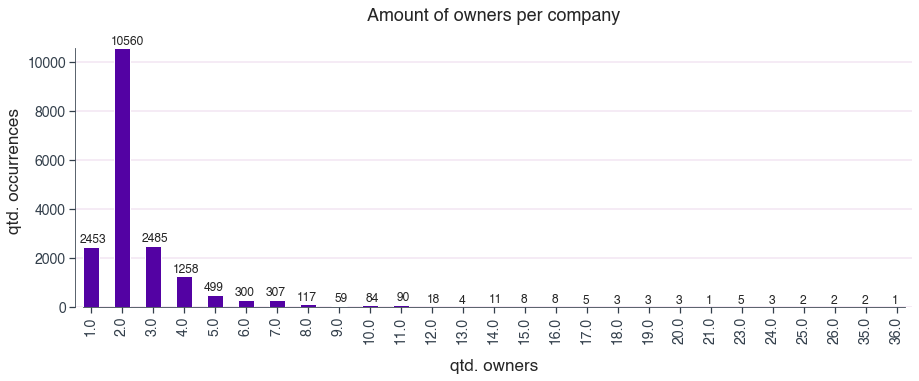

In [183]:
# let's create a graph with the amount of owners that the companies in the reimbursements usualy have
ax = beautify_graph(
    title='Amount of owners per company',
    x_label='qtd. owners',
    y_label='qtd. occurrences',
    graph=reimbursements_df_without_supplier_duplicates\
            [reimbursements_df_without_supplier_duplicates.company_qtd_owners!=0]\
            .company_qtd_owners.value_counts()\
            .sort_index()\
            .plot.bar(
                figsize=(15,5),
                fontsize=14,
            )
)
# adding a label with the amount of occurencies above each bar in the graph
for p in ax.patches:
    position_x = p.get_x() + (0.1 if p.get_height() < 100 else -0.1)
    position_y = p.get_height() * 1.01 + (150 if p.get_height() < 4000 else 50)
    ax.annotate(str(p.get_height()), (position_x, position_y))
    
# yeah, we already saw this graph before, but let's see it again to gain context

### How many establishment owners may be affiliated with any political party / the same political party than the congressperson who requested the reimbursement?

In [170]:
print('AMOUNT OF MATCHS (without considering the same establishment more than once)')
print('---'*35)
print()
print(f'Amount of owners of establishments............................................................: {int(reimbursements_df_without_supplier_duplicates.company_qtd_owners.sum())}')
print(f'Amount of owners which the name matched with the name of an affiliate of any political party..: {int(reimbursements_df_without_supplier_duplicates.qtd_owners_related_with_any_political_party.sum())}')
print(f'Owners with same name of an affiliate of the same political party than the congressperson\n'
      f'who requested the reimbursement...............................................................: {int(reimbursements_df_without_supplier_duplicates.qtd_owners_related_with_congressman_same_political_party.sum())}')



AMOUNT OF MATCHS (without considering the same establishment more than once)
---------------------------------------------------------------------------------------------------------

Amount of owners of establishments............................................................: 47143
Amount of owners which the name matched with the name of an affiliate of any political party..: 12303
Owners with same name of an affiliate of the same political party than the congressperson
who requested the reimbursement...............................................................: 2170


**Analyzing establishments whose owners are potentially affiliated with any political party**

Obs: we have 12303 owners which the name matched with the name of an affiliate of any political party



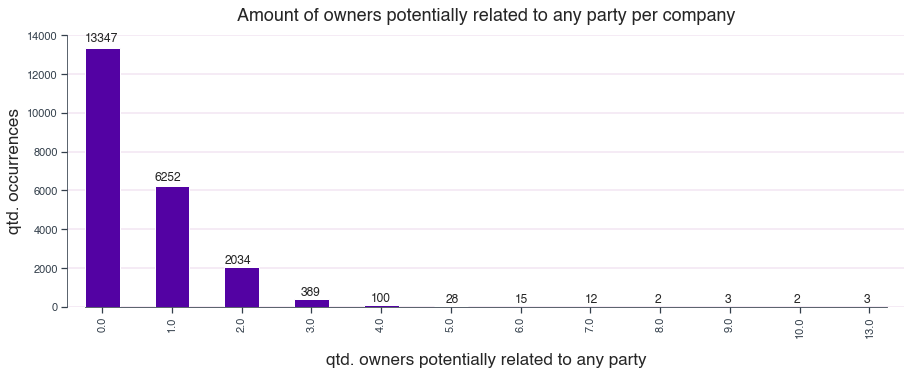

In [216]:
print(f'Obs: we have {int(reimbursements_df_without_supplier_duplicates.qtd_owners_related_with_any_political_party.sum())} owners which the name matched with the name of an affiliate of any political party')
print()

ax = beautify_graph(
    title='Amount of owners potentially related to any party per company',
    x_label='qtd. owners potentially related to any party',
    y_label='qtd. occurrences',
    graph=reimbursements_df_without_supplier_duplicates\
                .qtd_owners_related_with_any_political_party.value_counts()\
                .sort_index()\
                .plot.bar(figsize=(15,5))
)
# adding a label with the amount of occurencies above each bar in the graph
for p in ax.patches:
    position_x = p.get_x() + (0 if p.get_height() > 1000 else 0.17 if p.get_height() < 100 else 0.1)
    position_y = p.get_height() * 1.01 + 200
    ax.annotate(str(p.get_height()), (position_x, position_y))

We see some strange situations where coincidentally some establishments have more than 5 owners who have names identical to political party affiliate names (some with more than 10 names that match).

In [251]:
# get the reimbursement_id's of the reimbursements which the company have more than 5 owners 
# with the same name than an political party affiliate
ids = reimbursements_df_without_supplier_duplicates[
    reimbursements_df_without_supplier_duplicates.qtd_owners_related_with_any_political_party > 5
].reimbursement_id.unique()
# and let's see in the complete dataframe with the owner info if the names that matched are common names or not...
reimbursements_with_owner_info_df[
    (reimbursements_with_owner_info_df.reimbursement_id.isin(ids))
    &
    (~reimbursements_with_owner_info_df['NUMERO DA INSCRICAO'].isna())
].company_owner_name.unique()

array(['luis carlos saciloto tadiello', 'leonardo hoff',
       'carlos ronaldo vieira fernandes', 'vera inez salgueiro lermen',
       'cezar eduardo lindenmeyer', 'giovani francisco da silva',
       'marco da camino ancona lopez soligo',
       'jose carlos ramos de faria', 'flavio henrique ramos de faria',
       'maria valeria ramos de faria', 'carlos alberto ramos de faria',
       'francisco antonio ramos de faria',
       'claudio eduardo ramos de faria', 'manuel rocha alves',
       'antonio julio macorano', 'maria izabel alves',
       'antonio carlos pires da silva', 'roberto antonio alves',
       'manuel augusto alves', 'ari lourenco da silva',
       'joao celio da silva', 'neuza maria da silva',
       'maria do carmo da silva', 'ailton lourenco da silva',
       'lucia aparecida da silva lopes', 'nauto euzebio da silva',
       'jose carlos zandavali fiorini',
       'isabel cristina fiorini baldissera', 'paula rosa bertuol fiorini',
       'amadeu antonio bertuol', 'cl

What seems curious to me is that several names are not so common and seem unlikely to have homonyms.

And going deeper in some cases where many last names were alike I found some interesting things...
Let's see two of them:

In [277]:
# Checking this case where several members of the same family own the same establishment 
# and affiliate with the same political party as the congressperson who requested the refund
# Note that one of the owners (leonardo de souza siqueira) is namesake to several different political affiliates.
interesting_columns=[
    'company_owner_name', 
    'congressperson_name',
    'subquota_description',
    'state',
    'party', 
    'DATA DA FILIACAO',
    'NUMERO DA INSCRICAO',
    'SITUACAO DO REGISTRO',
    'SIGLA DO PARTIDO',
    'UF'
]
reimbursements_with_owner_info_df[
    reimbursements_with_owner_info_df.reimbursement_id==291063
][interesting_columns].set_index(['company_owner_name','SIGLA DO PARTIDO'])

congressperson_name  \
company_owner_name              SIGLA DO PARTIDO                       
lourinaldo de siqueira          PDT                   WOLNEY QUEIROZ   
marcia kaylla de souza siqueira PDT                   WOLNEY QUEIROZ   
leonardo de souza siqueira      PDT                   WOLNEY QUEIROZ   
                                PHS                   WOLNEY QUEIROZ   
                                PSOL                  WOLNEY QUEIROZ   
                                PT                    WOLNEY QUEIROZ   
                                PTB                   WOLNEY QUEIROZ   
leandro de souza siqueira       PDT                   WOLNEY QUEIROZ   
lourinaldo de siqueira junior   PDT                   WOLNEY QUEIROZ   
lucas de souza siqueira         NOVO                  WOLNEY QUEIROZ   

                                                                 subquota_description  \
company_owner_name              SIGLA DO PARTIDO                                        
lourinaldo de siqueira          PDT               Publicity of parliamentary activity   
marcia kaylla de souza siqueira PDT               Publicity of parliamentary activity   
leonardo de souza siqueira      PDT               Publicity of parliamentary activity   
                                PHS               Publicity of parliamentary activity   
                                PSOL              Publicity of parliamentary activity   
                                PT                Publicity of parliamentary activity   
                                PTB               Publicity of parliamentary activity   
leandro de souza siqueira       PDT               Publicity of parliamentary activity   
lourinaldo de siqueira junior   PDT               Publicity of parliamentary activity   
lucas de souza siqueira         NOVO              Publicity of parliamentary activity   

                                                 state party  \
company_owner_name              SIGLA DO PARTIDO               
lourinaldo de siqueira          PDT                 PE   PDT   
marcia kaylla de souza siqueira PDT                 PE   PDT   
leonardo de souza siqueira      PDT                 PE   PDT   
                                PHS                 PE   PDT   
                                PSOL                PE   PDT   
                                PT                  PE   PDT   
                                PTB                 PE   PDT   
leandro de souza siqueira       PDT                 PE   PDT   
lourinaldo de siqueira junior   PDT                 PE   PDT   
lucas de souza siqueira         NOVO                PE   PDT   

                                                          DATA DA FILIACAO  \
company_owner_name              SIGLA DO PARTIDO                             
lourinaldo de siqueira          PDT              2005-09-28 00:00:00+00:00   
marcia kaylla de souza siqueira PDT              2005-09-28 00:00:00+00:00   
leonardo de souza siqueira      PDT              2005-09-28 00:00:00+00:00   
                                PHS              2015-07-06 00:00:00+00:00   
                                PSOL             2013-04-10 00:00:00+00:00   
                                PT               1995-09-11 00:00:00+00:00   
                                PTB              2013-08-05 00:00:00+00:00   
leandro de souza siqueira       PDT              2005-09-28 00:00:00+00:00   
lourinaldo de siqueira junior   PDT              2005-09-28 00:00:00+00:00   
lucas de souza siqueira         NOVO             2017-07-07 00:00:00+00:00   

                                                  NUMERO DA INSCRICAO  \
company_owner_name              SIGLA DO PARTIDO                        
lourinaldo de siqueira          PDT                      1.975587e+09   
marcia kaylla de souza siqueira PDT                      1.747367e+09   
leonardo de souza siqueira      PDT                     -1.843686e+08   
                                PHS         

In [278]:
# Checking this case where apparently not only several people are from the same family are potentially 
# from the same party but also own the same establishment which one congressperson with the same last 
# name requested a reimbursement
# Note that the company owners that don't have values in the CAPSLOCK NAMED columns are not affiliated with
# any political party
interesting_columns=[
    'company_owner_name', 
    'congressperson_name',
    'subquota_description',
    'state',
    'party', 
    'DATA DA FILIACAO',
    'NUMERO DA INSCRICAO',
    'SITUACAO DO REGISTRO',
    'SIGLA DO PARTIDO',
    'UF'
]
reimbursements_with_owner_info_df[
    reimbursements_with_owner_info_df.reimbursement_id==127142
][interesting_columns]

,company_owner_name,congressperson_name,subquota_description,state,party,DATA DA FILIACAO,NUMERO DA INSCRICAO,SITUACAO DO REGISTRO,SIGLA DO PARTIDO,UF
335523,jose carlos ramos de faria,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,1995-12-12 00:00:00+00:00,-7.826609e+08,REGULAR,PP,MG
335524,maria cristina ramos faria chaves pedro,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,NaT,NaN,NaN,NaN,NaN
335525,flavio henrique ramos de faria,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,2003-10-02 00:00:00+00:00,-1.834106e+09,REGULAR,PTB,MG
335526,maria valeria ramos de faria,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,1996-03-07 00:00:00+00:00,5.052046e+08,REGULAR,PP,MG
335527,carlos alberto ramos de faria,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,2007-03-28 00:00:00+00:00,-2.458903e+08,REGULAR,PP,MG
335528,francisco antonio ramos de faria,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,2007-03-28 00:00:00+00:00,2.127537e+09,REGULAR,PTB,MG
335529,maria cleia ramos de faria,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,NaT,NaN,NaN,NaN,NaN
335530,maria fernanda ramos de faria paoliello nicolau,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,NaT,NaN,NaN,NaN,NaN
335531,ffca empreendimentos e participacoes ltda,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,NaT,NaN,NaN,NaN,NaN
335532,claudio eduardo ramos de faria,LUIZ FERNANDO FARIA,Fuels and lubricants,MG,PP,1995-09-15 00:00:00+00:00,-7.511109e+08,REGULAR,PP,MG


We have already looked into some weird cases in depth, but let's look over cases where establishment owners have names equal to people affiliated with the same party as the congressperson who requested the reimbursement.

**Analyzing establishments whose owners are potentially affiliated with the same party of the congressperson that made the refund request**

Obs: we have 2170 owners which the name matched with the name of an affiliate of the same political party of the congressperson that requested the refund



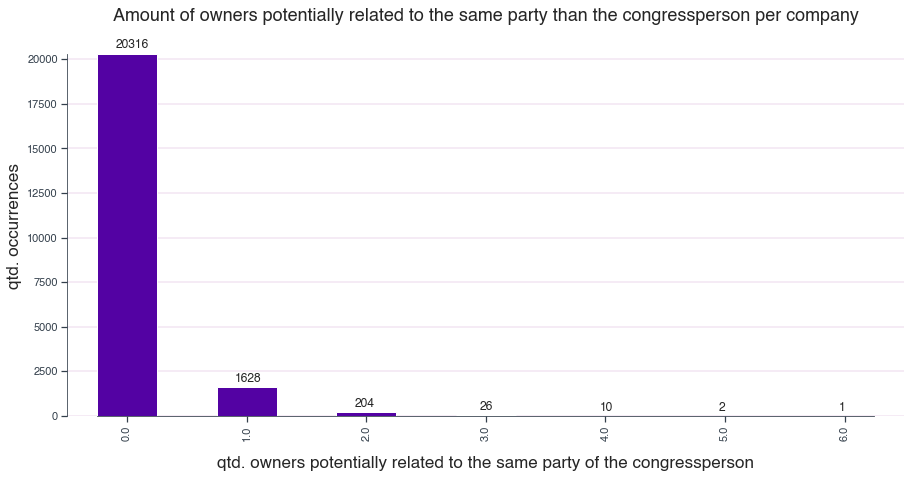

In [284]:
print(f'Obs: we have {int(reimbursements_df_without_supplier_duplicates.qtd_owners_related_with_congressman_same_political_party.sum())} owners which the name matched with the name of an affiliate of the same political party of the congressperson that requested the refund')
print()

ax = beautify_graph(
    title='Amount of owners potentially related to the same party than the congressperson per company',
    x_label='qtd. owners potentially related to the same party of the congressperson',
    y_label='qtd. occurrences',
    graph=reimbursements_df_without_supplier_duplicates\
                .qtd_owners_related_with_congressman_same_political_party.value_counts()\
                .sort_index()\
                .plot.bar(figsize=(15,7))
)
# adding a label with the amount of occurencies above each bar in the graph
for p in ax.patches:
    position_x = p.get_x() + (0.2 if p.get_height() < 100 else 0.15)
    position_y = p.get_height() + 300
    ax.annotate(str(p.get_height()), (position_x, position_y))

### Which political parties appear most when we have a match between the name of the establishment owner and an political party affiliate?

To see how many times a party shows up on reimbursements, let's use that giant dataframe with all matches between enterprise owners and affiliates.

Remember that **that dataframe is inflated with many affiliates who left one party to join another party or affiliates that are in more than one party at the same time**, but let's use this in favor of this analysis to get a more historical sense of which parties would be cited when analyzing name matches.

Another point to keep in mind is that **this dataframe has ALL refunds, so it is also inflated with multiple occurrences of the same company in multiple refunds**, but again, let's use this in favor of analysis to have a sense of which parties would be cited when analyzing the refunds.

What I want to see in the next three graphs is:
* In cases of reimbursement where the **name of the owner** of the establishment **matched the name of an affiliate to ANY political party**
    * Which parties appear most among the owner's parties?
    * Which parties appear most among the parties of the congressperson that requested the reimbursement?
* In cases of reimbursement where the **owner name is the same** as that of **an affiliated of the SAME party** as the congressperson who requested reimbursement
    * Which parties appear most?


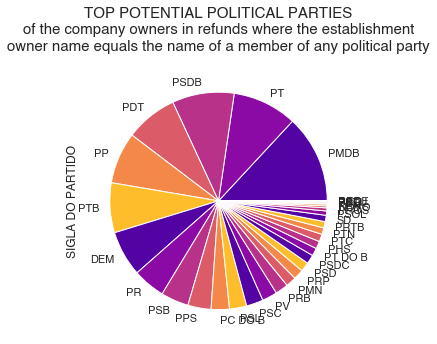

In [348]:
owner_has_same_name_than_affiliated_filter = ~reimbursements_with_owner_info_df['NOME DO FILIADO'].isna()

# In this case we will see the 'SIGLA DO PARTIDO' column that refers to the party of the 
# party affiliated that matched the establishment owner name
_ = reimbursements_with_owner_info_df[owner_has_same_name_than_affiliated_filter]\
        ['SIGLA DO PARTIDO'].value_counts()\
        .plot.pie(figsize=(10,5))\
        .set_title(
            label='TOP POTENTIAL POLITICAL PARTIES\n'
                  'of the company owners in refunds where the establishment\n'
                  'owner name equals the name of a member of any political party',
            fontdict={'fontsize': 15}, 
            pad=15,
        )

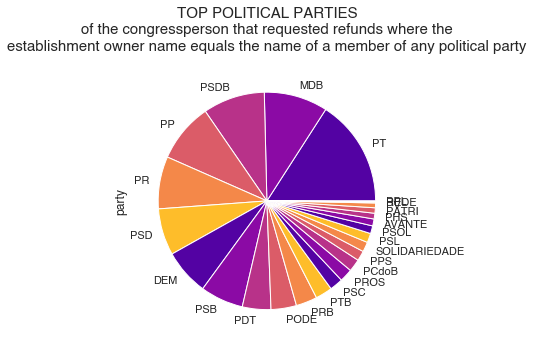

In [388]:
owner_has_same_name_than_affiliated_filter = ~reimbursements_with_owner_info_df['NOME DO FILIADO'].isna()

# In this case we will see the 'party' column that refers to the party of the congressperson
# who requested the reimbursement
# And we will keep only one occurency of an 'reimbursement_id' so we don't inflate the plot
# with cases where the establishment have a lot of owners
_ = reimbursements_with_owner_info_df[owner_has_same_name_than_affiliated_filter]\
        .drop_duplicates(subset=['reimbursement_id'], keep='first')\
        ['party'].value_counts()\
        .plot.pie(figsize=(10,5))\
        .set_title(
            label='TOP POLITICAL PARTIES\n'
                  'of the congressperson that requested refunds where the\n'
                  'establishment owner name equals the name of a member of any political party',
            fontdict={'fontsize': 15}, 
            pad=15,
        )

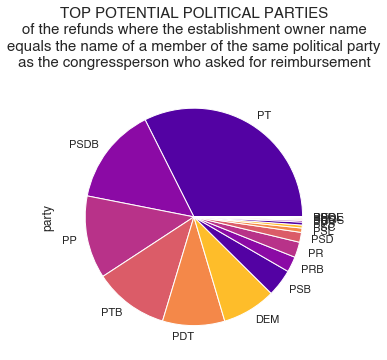

In [347]:
# let's see the top political parties in the case where
# the owner name is the same as that of an affiliated of the same party as
# the congressperson who requested reimbursement
same_party_filter = reimbursements_with_owner_info_df.party == reimbursements_with_owner_info_df['SIGLA DO PARTIDO']

_ = reimbursements_with_owner_info_df[same_party_filter]\
        ['party'].value_counts()\
        .plot.pie(figsize=(10,5))\
        .set_title(
            label='TOP POTENTIAL POLITICAL PARTIES\n'
                  'of the refunds where the establishment owner name\n'
                  'equals the name of a member of the same political party\n'
                  'as the congressperson who asked for reimbursement',
            fontdict={'fontsize': 15}, 
            pad=15,
        )

### What are the types of reimbursement of the incidents with owners that are potentially tied to political parties?

In [352]:
# some useful things to create lovely graphs
# jump to the next cell
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", palette="plasma")  # choosing a beautiful color to our graph

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

def beautify_graph(title, x_label, y_label, graph):
    # change the style of the graph box
    graph.spines['top'].set_color('none')
    graph.spines['right'].set_color('none')
    graph.spines['left'].set_smart_bounds(True)
    graph.spines['bottom'].set_smart_bounds(True)
    # adding auxiliary vertical lines 
    graph.grid(axis='x', color='purple', alpha=0.1, linestyle='-', linewidth=1.5)
    # adding title
    _ = graph.set_title(title, fontdict={'fontsize': 18}, pad=15)
    # adding x and y labels
    graph.set_xlabel(x_label, fontdict={'fontsize': 17}, labelpad=15)
    graph.set_ylabel(y_label, fontdict={'fontsize': 17}, labelpad=5)
    return graph

To see which refund types appear most we will use the dataframe with one line for each refund made.

First we'll take the context by looking at the types of refunds that happen most regardless of who owns the establishment where the refund was made.

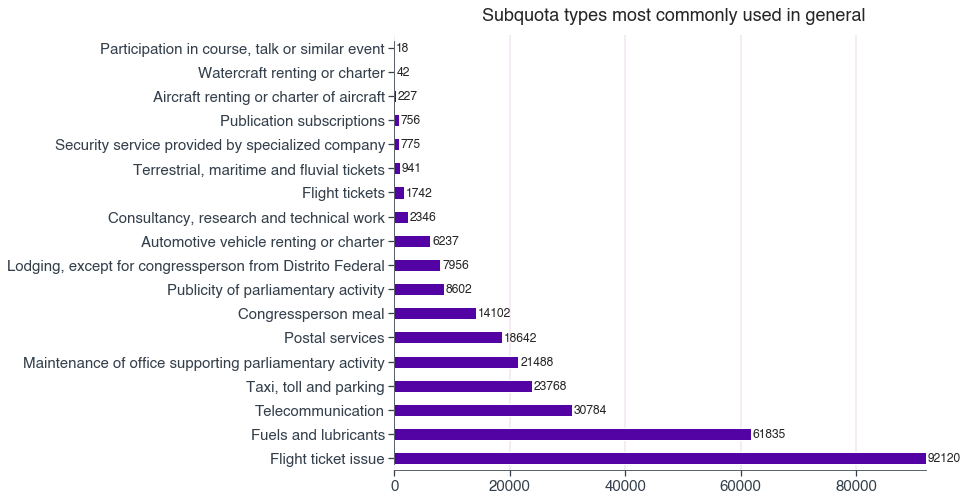

In [386]:
ax = beautify_graph(
    title='Subquota types most commonly used in general',
    x_label='',
    y_label='', 
    graph=reimbursements_df['subquota_description']\
                .value_counts()\
                .plot.barh(
                    figsize=(10,8),
                    fontsize=15,
                )
)
# adding a label with the amount of occurencies next to each bar in the graph
for p in ax.patches:
    position_x = p.get_width() + 300
    position_y = p.get_y() + 0.1
    ax.annotate(str(p.get_width()), (position_x, position_y))

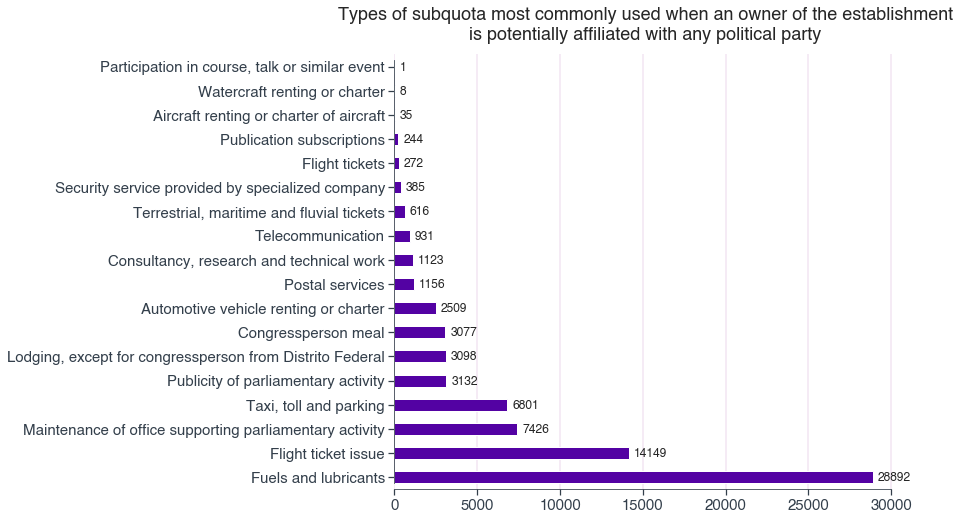

In [385]:
ax = beautify_graph(
    title='Types of subquota most commonly used when an owner of the establishment\n'
          'is potentially affiliated with any political party',
    x_label='',
    y_label='', 
    graph=reimbursements_df[
                    reimbursements_df.qtd_owners_related_with_any_political_party > 0
                ]['subquota_description']\
                .value_counts()\
                .plot.barh(
                    figsize=(9,8),
                    fontsize=15,
                )
)
# adding a label with the amount of occurencies next to each bar in the graph
for p in ax.patches:
    position_x = p.get_width() + 300
    position_y = p.get_y() + 0.1
    ax.annotate(str(p.get_width()), (position_x, position_y))

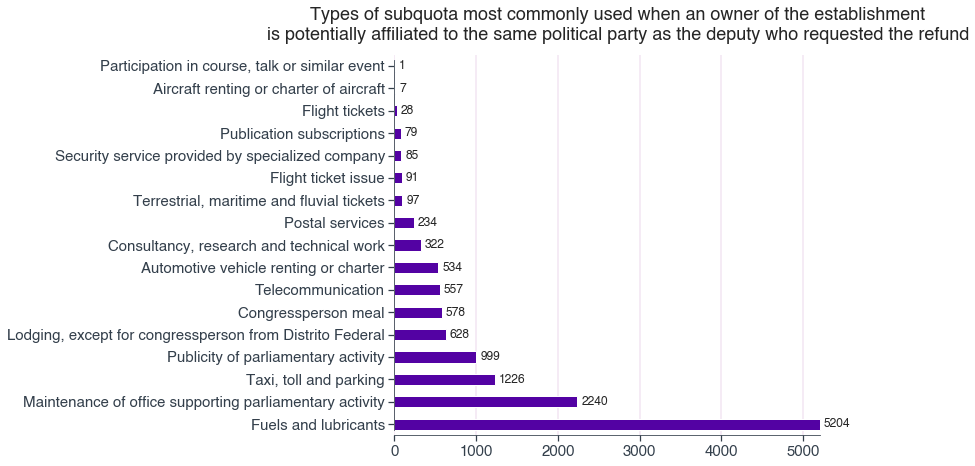

In [390]:
ax = beautify_graph(
    title='Types of subquota most commonly used when an owner of the establishment\n'
          'is potentially affiliated to the same political party as the deputy who requested the refund',
    x_label='',
    y_label='', 
    graph=reimbursements_df[
                    reimbursements_df.qtd_owners_related_with_congressman_same_political_party > 0
                ]['subquota_description']\
                .value_counts()\
                .plot.barh(
                    figsize=(8,7),
                    fontsize=15,
                )
)
# adding a label with the amount of occurencies next to each bar in the graph
for p in ax.patches:
    position_x = p.get_width() + 50
    position_y = p.get_y() + 0.1
    ax.annotate(str(p.get_width()), (position_x, position_y))

### Is there a difference in value between the suspicious reimbursements of the establishment owner being from a political party against those who have no such suspicion??

This is the last session of this notebook.

It's here more out of curiosity, as I didn't get much insight from it for being a bit inconclusive, but feel free to see the resulting graps :)

In [513]:
# some useful things to create lovely graphs
# jump to the next cell
def set_axis_style(axis, title, x_label, y_label):
    # setting labels
    axis.set_title(title, fontdict={'fontsize': 17}, pad=10)
    axis.set_ylabel(y_label, fontdict={'fontsize': 17}, labelpad=10)
    axis.set_xlabel(x_label, fontdict={'fontsize': 17}, labelpad=10)
    # change the style of the graph box
    axis.spines['top'].set_color('none')
    axis.spines['right'].set_color('none')
    axis.spines['left'].set_smart_bounds(True)
    axis.spines['bottom'].set_smart_bounds(True)
    # adding auxiliary horizontal lines
    axis.grid(axis='y', color='purple', alpha=0.1, linestyle='-', linewidth=1.5)
    # customizing the x ticks
    axis.tick_params(labelsize=14)
    axis.set_xticks([1,2])
    axis.set_xticklabels(['YES', 'NO'])
    
def remove_outliers(series, quantile=0.95):
    q = series.quantile(quantile)
    return series[series < q].values

def create_comparative_violin_plot(title, x_label, y_label, reimbursements_when_is_from_same_party, reimbursements_when_is_not_from_same_party):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
    # custom our graph
    fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(wspace=0.6, top = 0.85)  # add more spacing between the plots
    # Creating first violin plot with outliers
    ax1.violinplot(
        showmeans=True,
        dataset = [reimbursements_when_is_from_same_party.values,
                   reimbursements_when_is_not_from_same_party.values]
    )
    set_axis_style(ax1, 'with outliers', x_label, y_label)
    # Creating second violin plot without outliers
    ax2.violinplot(
        showmeans=True,
        dataset = [remove_outliers(reimbursements_when_is_from_same_party),
                   remove_outliers(reimbursements_when_is_not_from_same_party)]
    )
    set_axis_style(ax2, 'without outliers', x_label, y_label)
    # show the resulting graph
    plt.show()
    
def create_reimbursements_comparizon_violin_plot(subquota_to_plot):
    import pandas as pd
    import matplotlib.pyplot as plt
    reimbursements_of_subquota = reimbursements_df[reimbursements_df.subquota_description == subquota_to_plot]
    is_from_same_party = (reimbursements_of_subquota.qtd_owners_related_with_congressman_same_political_party > 0)
    is_not_from_same_party = (reimbursements_of_subquota.qtd_owners_related_with_congressman_same_political_party == 0)

    create_comparative_violin_plot(
        title=f'{subquota_to_plot} refunds',
        x_label='supplier owner is potentially from \n the same party than congressperson',
        y_label='amount spent on the refund',
        reimbursements_when_is_from_same_party=reimbursements_of_subquota[is_from_same_party]["total_net_value"],
        reimbursements_when_is_not_from_same_party=reimbursements_of_subquota[is_not_from_same_party]["total_net_value"],
    )

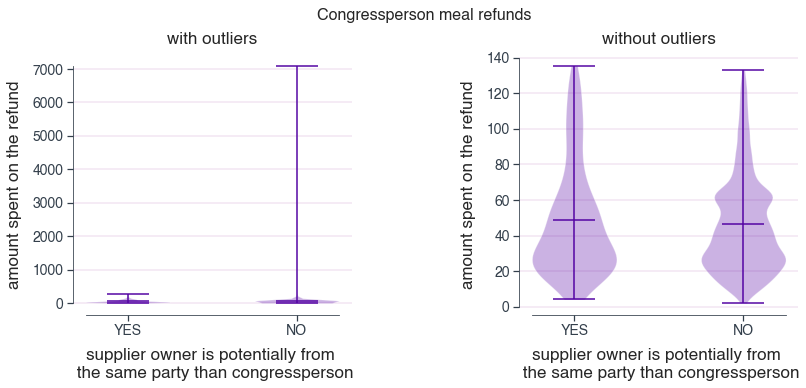

In [529]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Congressperson meal'
)

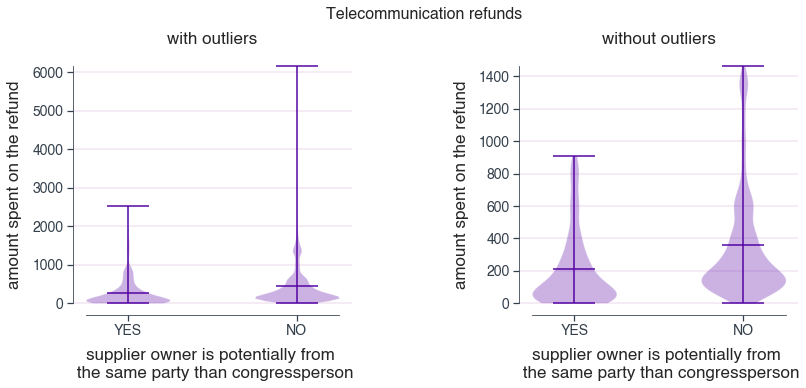

In [533]:
create_reimbursements_comparizon_violin_plot(
    suabquota_to_plot='Telecommunication'
)

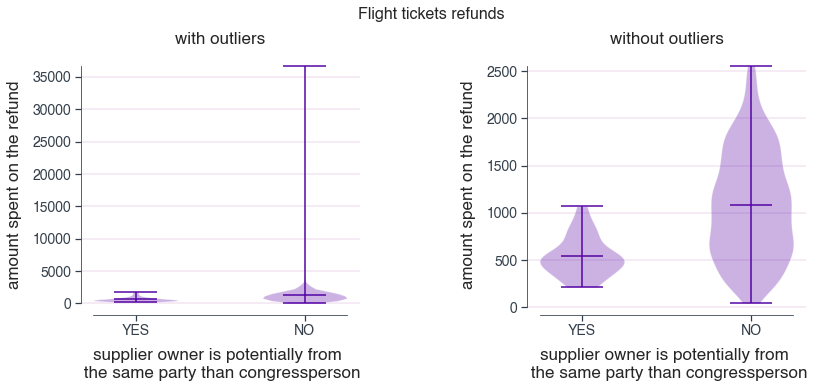

In [522]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Flight tickets'
)

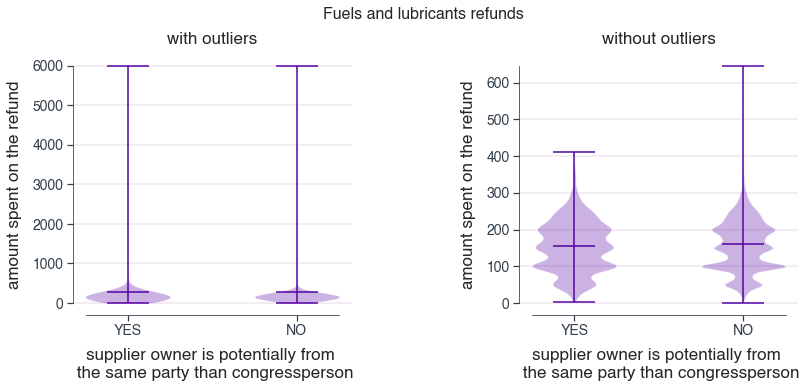

In [535]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Fuels and lubricants'
)

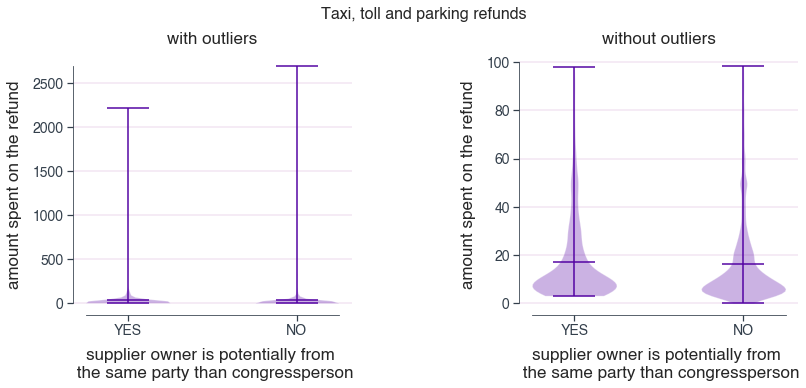

In [532]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Taxi, toll and parking'
)

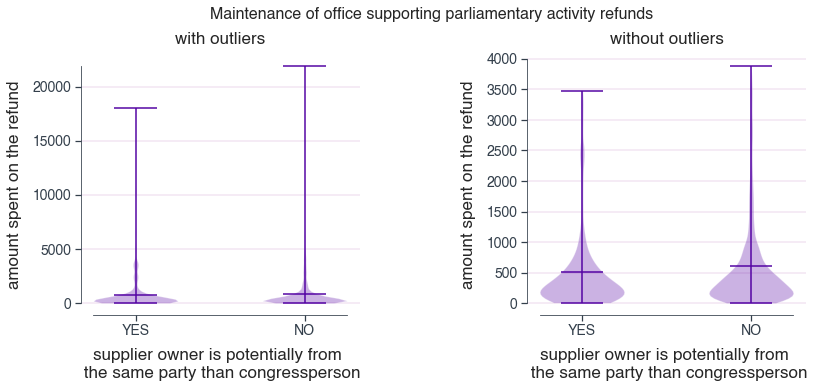

In [531]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Maintenance of office supporting parliamentary activity'
)

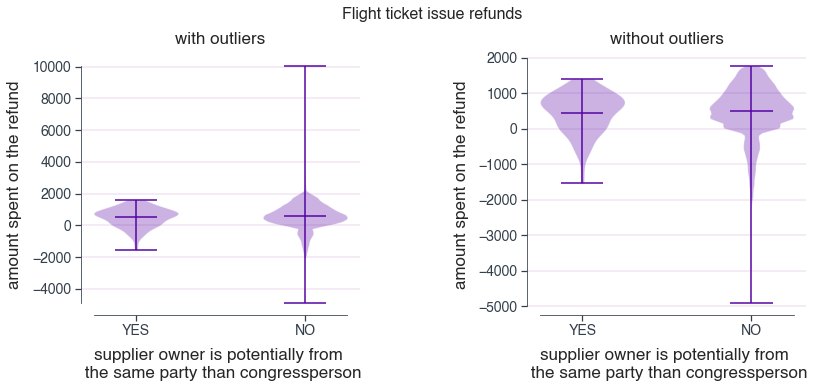

In [536]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Flight ticket issue'
)

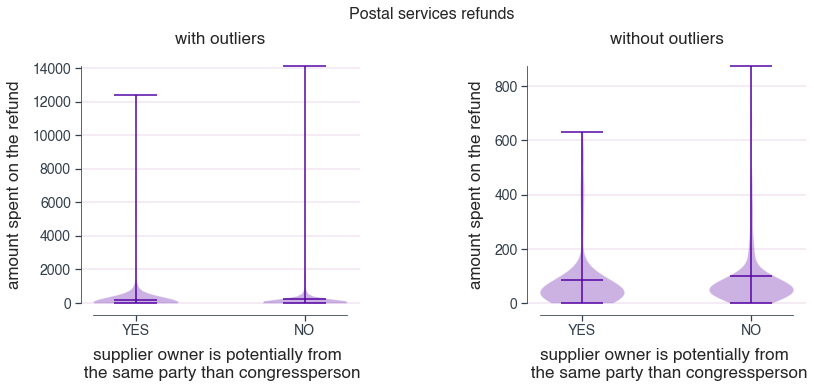

In [530]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Postal services'
)

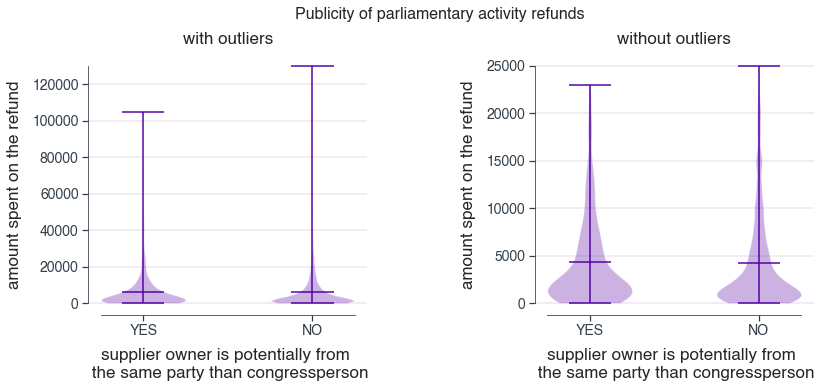

In [528]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Publicity of parliamentary activity'
)

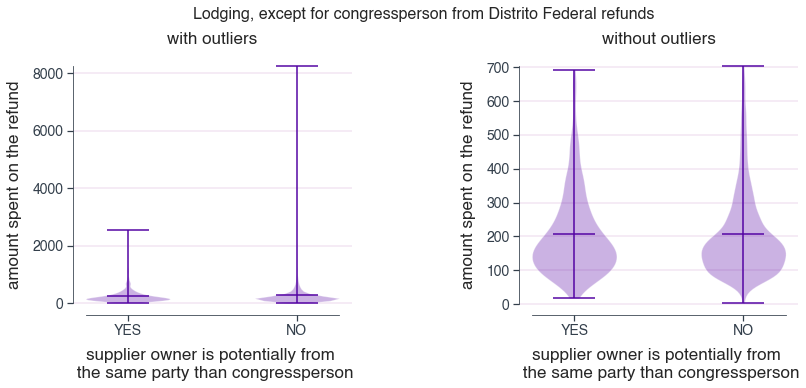

In [527]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Lodging, except for congressperson from Distrito Federal'
)

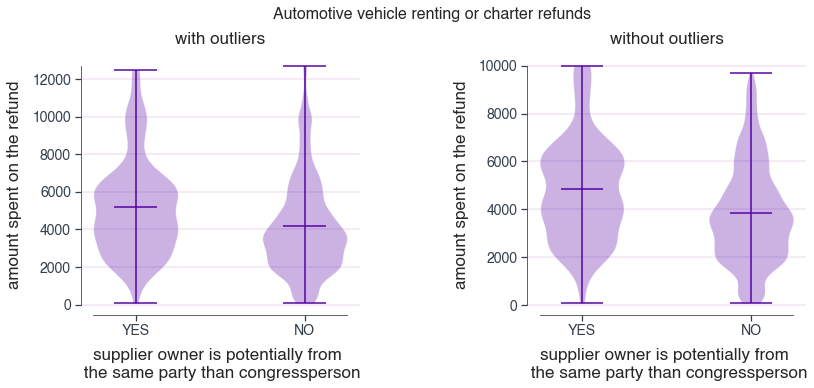

In [525]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Automotive vehicle renting or charter'
)

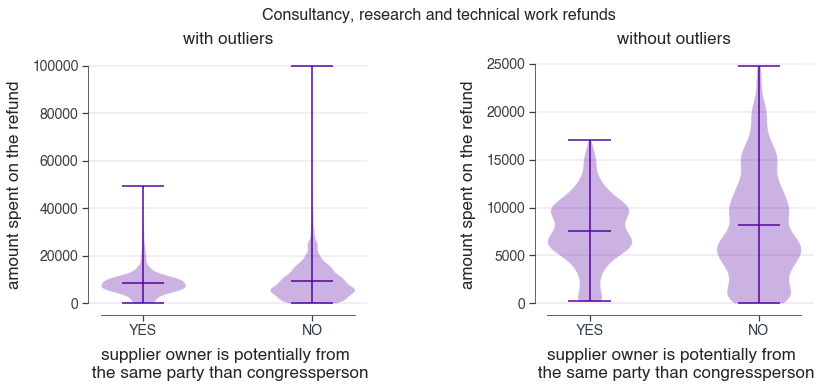

In [523]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Consultancy, research and technical work'
)

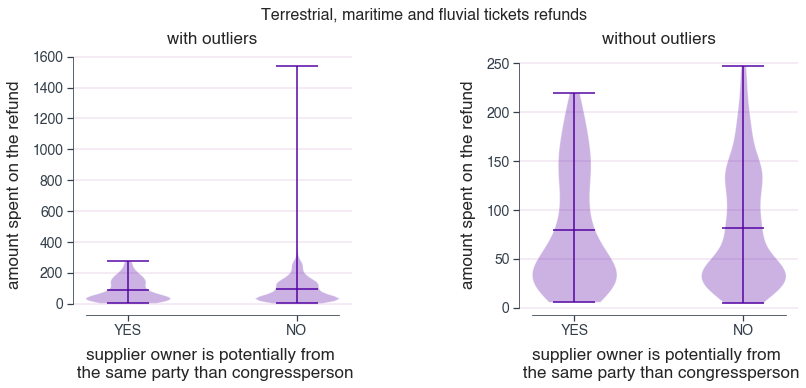

In [521]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Terrestrial, maritime and fluvial tickets'
)

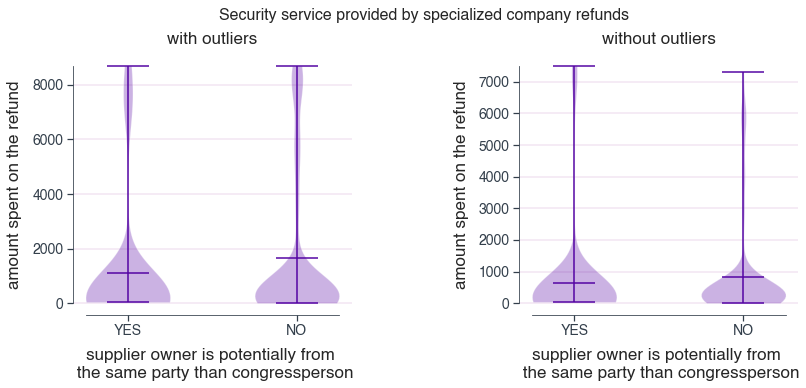

In [520]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Security service provided by specialized company'
)

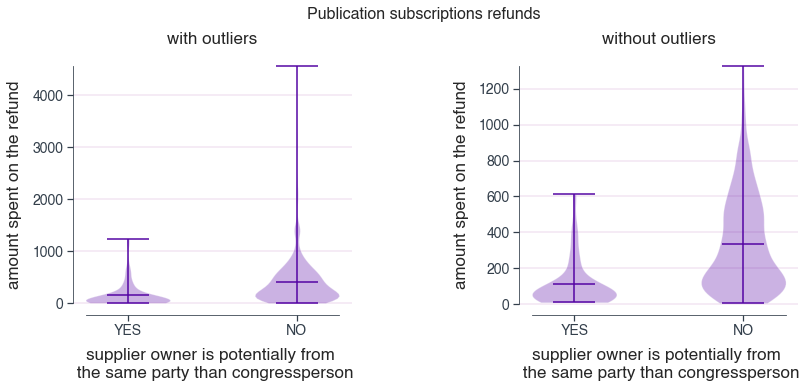

In [519]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Publication subscriptions'
)

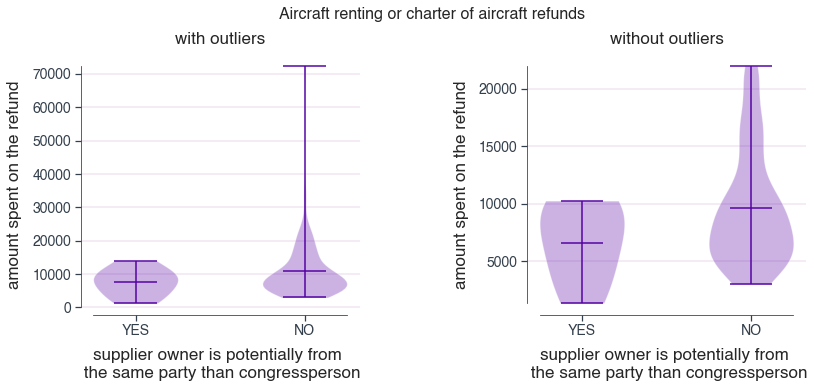

In [518]:
create_reimbursements_comparizon_violin_plot(
    subquota_to_plot='Aircraft renting or charter of aircraft'
)

---

**Thanks for reading!**

This notebook was made with ❤️ by [@dehatanes](https://github.com/dehatanes/)